# Radicais

Guloso

In [1]:
import re

In [2]:
regex = r"[-'a-zA-ZÀ-ÖØ-öø-ÿ0-9]+"   # Considerar Acentuações
documento = open('Semana_Machado_Assis.txt','r',encoding='utf-8')
conteudo = documento.read()


In [3]:
print(conteudo)

                                        

                                    A semana

                                        
                                                                             

                                                                 Texto-fonte:

                                           Obra Completa de Machado de Assis.

                                Rio de Janeiro: Nova Aguilar, Vol. III, 1994.

                                                                             

            Publicado originalmente na Gazeta de Notícias, Rio de Janeiro, de
                                                     24/04/1892 a 11/11/1900.

    

    

                                      1892


    

                                  24 de abril

    

   Na segunda feira da semana que findou, acordei cedo, pouco depois das
   galinhas, e dei-me ao gosto de propor a mim mesmo um problema.
   Verdadeiramente era uma charada; mas o nome de problema dá di

In [4]:
# leitura das stopwords
lista_stopwords = open("stopwords-pt.txt",'r', encoding='utf-8')
stopwords = set([]) 
for s in lista_stopwords.readlines():
    stopwords.add(s.strip().lower())

print(stopwords)
    


{'mas', 'era', 'teria', 'também', 'tenhamos', 'com', 'aquela', 'estivemos', 'estivesse', 'houvemos', 'houverem', 'já', 'o', 'houvesse', 'tém', 'tivéssemos', 'aqueles', 'sejamos', 'estiveram', 'houveram', 'lá', 'tivera', 'lhe', 'hajam', 'estivéssemos', 'elas', 'esses', 'muito', 'tínhamos', 'ele', 'da', 'te', 'teríamos', 'houveremos', 'houvéramos', 'houverão', 'houver', 'houveria', 'pela', 'esse', 'à', 'de', 'que', 'haja', 'nossos', 'formos', 'havemos', 'tem', 'temos', 'depois', 'fomos', 'sem', 'me', 'terei', 'num', 'pelas', 'tiver', 'nossa', 'há', 'seu', 'tenham', 'dele', 'tuas', 'isso', 'éramos', 'forem', 'até', 'dá', 'estiverem', 'aos', 'hajamos', 'tivessem', 'do', 'houverá', 'houvessem', 'teu', 'numa', 'houveriam', 'estivéramos', 'das', 'hão', 'estejamos', 'fui', 'sou', 'pelos', 'aquele', 'são', 'tivermos', 'na', 'você', 'estivessem', 'foram', 'esteja', 'para', 'às', 'minhas', 'pelo', 'estiver', 'serão', 'somos', 'mesmo', 'esteve', 'fôssemos', 'houverei', 'estes', 'serei', 'tiverem',

In [5]:
frequencias = dict([])
all_summary = ""
    
palavras = re.findall(regex, conteudo)
for w in palavras:    
    w = w.lower()
    w = w.strip().lower()        
    
    if w not in stopwords:
        w = w[0:3] 
        all_summary += " " + w
        if w not in frequencias:
            frequencias[w] = 0
        frequencias[w] += 1
    

In [7]:
# imprimir as 10 palavras mais frequentes
classifica = sorted(frequencias, key=frequencias.get, reverse=True)
for i in range(0,10):
    print (f"--> {frequencias[classifica[i]]} {classifica[i]}")


--> 3205 con
--> 2007 des
--> 1661 out
--> 1506 com
--> 1336 pro
--> 1299 par
--> 1112 pod
--> 1045 est
--> 1041 pre
--> 1020 tod


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



In [9]:
print(all_summary)

 sem tex obr com mac ass rio jan nov agu vol iii 199 pub ori gaz not rio jan 24 04 189 11 11 190 189 24 abr seg fei sem fin aco ced pou gal dei gos pro mim pro ver cha nom pro dig exc log ate lei aus atr faz ben fes art coi mes bil cre igu mod núm pre res com dra ope pol doi ato poe vár ram lam col gra gal ofe cen ret ben tud ped cer ele con doi vel est viz tod dia fes art cav ord ros ser rel gue par out pos ten gua nac res pre bon ser jog xad dor int jog des out des man car maj - pro com var vez car com - maj tud ped cer ele ir lon tir exe sem cen gra már pri her alf dev ser com tod fil des paí nel pat pat out coi sim mot pal gro rot cap por bem est vin boa not ins pop aco exa raz fez fig alf xav pri inc col par mei raç gló mer dec est out pat ofe car pec isr cho ale viu com pen mor com pen ia ser exe nel enf esq dec rec prê pro mar gan tod vis pag tod ora dia 21 obs inc ven car iam out con alf poi ten ven his dê pri cad dis jus out têm ain bel pap for tor tir cor igu oce dia pro enc 

In [10]:
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)


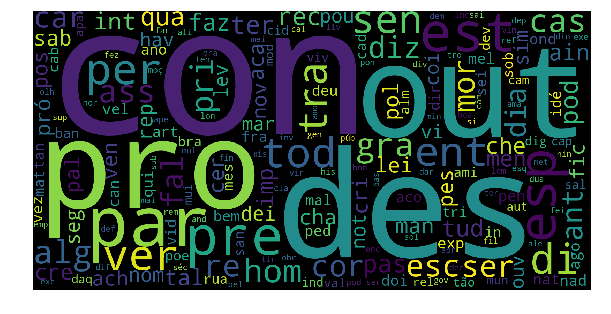

In [11]:
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)


In [12]:
#salvando a imagem
wordcloud.to_file("guloso.png")


Porter Stemming Algorithm

In [13]:
class PorterStemmer:

    def __init__(self):
        """The main part of the stemming algorithm starts here.
        b is a buffer holding a word to be stemmed. The letters are in b[k0],
        b[k0+1] ... ending at b[k]. In fact k0 = 0 in this demo program. k is
        readjusted downwards as the stemming progresses. Zero termination is
        not in fact used in the algorithm.

        Note that only lower case sequences are stemmed. Forcing to lower case
        should be done before stem(...) is called.
        """

        self.b = ""  # buffer for word to be stemmed
        self.k = 0
        self.k0 = 0
        self.j = 0   # j is a general offset into the string

    def cons(self, i):
        """cons(i) is TRUE <=> b[i] is a consonant."""
        if self.b[i] == 'a' or self.b[i] == 'e' or self.b[i] == 'i' or self.b[i] == 'o' or self.b[i] == 'u':
            return 0
        if self.b[i] == 'y':
            if i == self.k0:
                return 1
            else:
                return (not self.cons(i - 1))
        return 1

    def m(self):
        """m() measures the number of consonant sequences between k0 and j.
        if c is a consonant sequence and v a vowel sequence, and <..>
        indicates arbitrary presence,

           <c><v>       gives 0
           <c>vc<v>     gives 1
           <c>vcvc<v>   gives 2
           <c>vcvcvc<v> gives 3
           ....
        """
        n = 0
        i = self.k0
        while 1:
            if i > self.j:
                return n
            if not self.cons(i):
                break
            i = i + 1
        i = i + 1
        while 1:
            while 1:
                if i > self.j:
                    return n
                if self.cons(i):
                    break
                i = i + 1
            i = i + 1
            n = n + 1
            while 1:
                if i > self.j:
                    return n
                if not self.cons(i):
                    break
                i = i + 1
            i = i + 1

    def vowelinstem(self):
        """vowelinstem() is TRUE <=> k0,...j contains a vowel"""
        for i in range(self.k0, self.j + 1):
            if not self.cons(i):
                return 1
        return 0

    def doublec(self, j):
        """doublec(j) is TRUE <=> j,(j-1) contain a double consonant."""
        if j < (self.k0 + 1):
            return 0
        if (self.b[j] != self.b[j-1]):
            return 0
        return self.cons(j)

    def cvc(self, i):
        """cvc(i) is TRUE <=> i-2,i-1,i has the form consonant - vowel - consonant
        and also if the second c is not w,x or y. this is used when trying to
        restore an e at the end of a short  e.g.

           cav(e), lov(e), hop(e), crim(e), but
           snow, box, tray.
        """
        if i < (self.k0 + 2) or not self.cons(i) or self.cons(i-1) or not self.cons(i-2):
            return 0
        ch = self.b[i]
        if ch == 'w' or ch == 'x' or ch == 'y':
            return 0
        return 1

    def ends(self, s):
        """ends(s) is TRUE <=> k0,...k ends with the string s."""
        length = len(s)
        if s[length - 1] != self.b[self.k]: # tiny speed-up
            return 0
        if length > (self.k - self.k0 + 1):
            return 0
        if self.b[self.k-length+1:self.k+1] != s:
            return 0
        self.j = self.k - length
        return 1

    def setto(self, s):
        """setto(s) sets (j+1),...k to the characters in the string s, readjusting k."""
        length = len(s)
        self.b = self.b[:self.j+1] + s + self.b[self.j+length+1:]
        self.k = self.j + length

    def r(self, s):
        """r(s) is used further down."""
        if self.m() > 0:
            self.setto(s)

    def step1ab(self):
        """step1ab() gets rid of plurals and -ed or -ing. e.g.

           caresses  ->  caress
           ponies    ->  poni
           ties      ->  ti
           caress    ->  caress
           cats      ->  cat

           feed      ->  feed
           agreed    ->  agree
           disabled  ->  disable

           matting   ->  mat
           mating    ->  mate
           meeting   ->  meet
           milling   ->  mill
           messing   ->  mess

           meetings  ->  meet
        """
        if self.b[self.k] == 's':
            if self.ends("sses"):
                self.k = self.k - 2
            elif self.ends("ies"):
                self.setto("i")
            elif self.b[self.k - 1] != 's':
                self.k = self.k - 1
        if self.ends("eed"):
            if self.m() > 0:
                self.k = self.k - 1
        elif (self.ends("ed") or self.ends("ing")) and self.vowelinstem():
            self.k = self.j
            if self.ends("at"):   self.setto("ate")
            elif self.ends("bl"): self.setto("ble")
            elif self.ends("iz"): self.setto("ize")
            elif self.doublec(self.k):
                self.k = self.k - 1
                ch = self.b[self.k]
                if ch == 'l' or ch == 's' or ch == 'z':
                    self.k = self.k + 1
            elif (self.m() == 1 and self.cvc(self.k)):
                self.setto("e")

    def step1c(self):
        """step1c() turns terminal y to i when there is another vowel in the stem."""
        if (self.ends("y") and self.vowelinstem()):
            self.b = self.b[:self.k] + 'i' + self.b[self.k+1:]

    def step2(self):
        """step2() maps double suffices to single ones.
        so -ization ( = -ize plus -ation) maps to -ize etc. note that the
        string before the suffix must give m() > 0.
        """
        if self.b[self.k - 1] == 'a':
            if self.ends("ational"):   self.r("ate")
            elif self.ends("tional"):  self.r("tion")
        elif self.b[self.k - 1] == 'c':
            if self.ends("enci"):      self.r("ence")
            elif self.ends("anci"):    self.r("ance")
        elif self.b[self.k - 1] == 'e':
            if self.ends("izer"):      self.r("ize")
        elif self.b[self.k - 1] == 'l':
            if self.ends("bli"):       self.r("ble") # --DEPARTURE--
            # To match the published algorithm, replace this phrase with
            #   if self.ends("abli"):      self.r("able")
            elif self.ends("alli"):    self.r("al")
            elif self.ends("entli"):   self.r("ent")
            elif self.ends("eli"):     self.r("e")
            elif self.ends("ousli"):   self.r("ous")
        elif self.b[self.k - 1] == 'o':
            if self.ends("ization"):   self.r("ize")
            elif self.ends("ation"):   self.r("ate")
            elif self.ends("ator"):    self.r("ate")
        elif self.b[self.k - 1] == 's':
            if self.ends("alism"):     self.r("al")
            elif self.ends("iveness"): self.r("ive")
            elif self.ends("fulness"): self.r("ful")
            elif self.ends("ousness"): self.r("ous")
        elif self.b[self.k - 1] == 't':
            if self.ends("aliti"):     self.r("al")
            elif self.ends("iviti"):   self.r("ive")
            elif self.ends("biliti"):  self.r("ble")
        elif self.b[self.k - 1] == 'g': # --DEPARTURE--
            if self.ends("logi"):      self.r("log")
        # To match the published algorithm, delete this phrase

    def step3(self):
        """step3() dels with -ic-, -full, -ness etc. similar strategy to step2."""
        if self.b[self.k] == 'e':
            if self.ends("icate"):     self.r("ic")
            elif self.ends("ative"):   self.r("")
            elif self.ends("alize"):   self.r("al")
        elif self.b[self.k] == 'i':
            if self.ends("iciti"):     self.r("ic")
        elif self.b[self.k] == 'l':
            if self.ends("ical"):      self.r("ic")
            elif self.ends("ful"):     self.r("")
        elif self.b[self.k] == 's':
            if self.ends("ness"):      self.r("")

    def step4(self):
        """step4() takes off -ant, -ence etc., in context <c>vcvc<v>."""
        if self.b[self.k - 1] == 'a':
            if self.ends("al"): pass
            else: return
        elif self.b[self.k - 1] == 'c':
            if self.ends("ance"): pass
            elif self.ends("ence"): pass
            else: return
        elif self.b[self.k - 1] == 'e':
            if self.ends("er"): pass
            else: return
        elif self.b[self.k - 1] == 'i':
            if self.ends("ic"): pass
            else: return
        elif self.b[self.k - 1] == 'l':
            if self.ends("able"): pass
            elif self.ends("ible"): pass
            else: return
        elif self.b[self.k - 1] == 'n':
            if self.ends("ant"): pass
            elif self.ends("ement"): pass
            elif self.ends("ment"): pass
            elif self.ends("ent"): pass
            else: return
        elif self.b[self.k - 1] == 'o':
            if self.ends("ion") and (self.b[self.j] == 's' or self.b[self.j] == 't'): pass
            elif self.ends("ou"): pass
            # takes care of -ous
            else: return
        elif self.b[self.k - 1] == 's':
            if self.ends("ism"): pass
            else: return
        elif self.b[self.k - 1] == 't':
            if self.ends("ate"): pass
            elif self.ends("iti"): pass
            else: return
        elif self.b[self.k - 1] == 'u':
            if self.ends("ous"): pass
            else: return
        elif self.b[self.k - 1] == 'v':
            if self.ends("ive"): pass
            else: return
        elif self.b[self.k - 1] == 'z':
            if self.ends("ize"): pass
            else: return
        else:
            return
        if self.m() > 1:
            self.k = self.j

    def step5(self):
        """step5() removes a final -e if m() > 1, and changes -ll to -l if
        m() > 1.
        """
        self.j = self.k
        if self.b[self.k] == 'e':
            a = self.m()
            if a > 1 or (a == 1 and not self.cvc(self.k-1)):
                self.k = self.k - 1
        if self.b[self.k] == 'l' and self.doublec(self.k) and self.m() > 1:
            self.k = self.k -1

    def stem(self, p, i, j):
        """In stem(p,i,j), p is a char pointer, and the string to be stemmed
        is from p[i] to p[j] inclusive. Typically i is zero and j is the
        offset to the last character of a string, (p[j+1] == '\0'). The
        stemmer adjusts the characters p[i] ... p[j] and returns the new
        end-point of the string, k. Stemming never increases word length, so
        i <= k <= j. To turn the stemmer into a module, declare 'stem' as
        extern, and delete the remainder of this file.
        """
        # copy the parameters into statics
        self.b = p
        self.k = j
        self.k0 = i
        if self.k <= self.k0 + 1:
            return self.b # --DEPARTURE--

        # With this line, strings of length 1 or 2 don't go through the
        # stemming process, although no mention is made of this in the
        # published algorithm. Remove the line to match the published
        # algorithm.

        self.step1ab()
        self.step1c()
        self.step2()
        self.step3()
        self.step4()
        self.step5()
        return self.b[self.k0:self.k+1]


In [14]:
regex = r"[-'a-zA-ZÀ-ÖØ-öø-ÿ0-9]+"   # Considerar Acentuações
documento = open('Semana_Machado_Assis.txt','r',encoding='utf-8')
conteudo = documento.read()


In [15]:
print(documento)

<_io.TextIOWrapper name='Semana_Machado_Assis.txt' mode='r' encoding='utf-8'>


In [16]:
print(conteudo)

                                        

                                    A semana

                                        
                                                                             

                                                                 Texto-fonte:

                                           Obra Completa de Machado de Assis.

                                Rio de Janeiro: Nova Aguilar, Vol. III, 1994.

                                                                             

            Publicado originalmente na Gazeta de Notícias, Rio de Janeiro, de
                                                     24/04/1892 a 11/11/1900.

    

    

                                      1892


    

                                  24 de abril

    

   Na segunda feira da semana que findou, acordei cedo, pouco depois das
   galinhas, e dei-me ao gosto de propor a mim mesmo um problema.
   Verdadeiramente era uma charada; mas o nome de problema dá di

In [17]:
# leitura das stopwords
lista_stopwords = open("stopwords-pt.txt",'r', encoding='utf-8')
stopwords = set([]) 
for s in lista_stopwords.readlines():
    stopwords.add(s.strip().lower())

print(stopwords)


{'mas', 'era', 'teria', 'também', 'tenhamos', 'com', 'aquela', 'estivemos', 'estivesse', 'houvemos', 'houverem', 'já', 'o', 'houvesse', 'tém', 'tivéssemos', 'aqueles', 'sejamos', 'estiveram', 'houveram', 'lá', 'tivera', 'lhe', 'hajam', 'estivéssemos', 'elas', 'esses', 'muito', 'tínhamos', 'ele', 'da', 'te', 'teríamos', 'houveremos', 'houvéramos', 'houverão', 'houver', 'houveria', 'pela', 'esse', 'à', 'de', 'que', 'haja', 'nossos', 'formos', 'havemos', 'tem', 'temos', 'depois', 'fomos', 'sem', 'me', 'terei', 'num', 'pelas', 'tiver', 'nossa', 'há', 'seu', 'tenham', 'dele', 'tuas', 'isso', 'éramos', 'forem', 'até', 'dá', 'estiverem', 'aos', 'hajamos', 'tivessem', 'do', 'houverá', 'houvessem', 'teu', 'numa', 'houveriam', 'estivéramos', 'das', 'hão', 'estejamos', 'fui', 'sou', 'pelos', 'aquele', 'são', 'tivermos', 'na', 'você', 'estivessem', 'foram', 'esteja', 'para', 'às', 'minhas', 'pelo', 'estiver', 'serão', 'somos', 'mesmo', 'esteve', 'fôssemos', 'houverei', 'estes', 'serei', 'tiverem',

In [18]:
frequencias = dict([])
all_summary = ""
    
palavras = re.findall(regex, conteudo)
for w in palavras:    
    p = PorterStemmer()    
    w = w.lower()       
    
    if w not in stopwords:
        w = p.stem(w, 0,len(w)-1)  
        all_summary += " " + w
        if w not in frequencias:
            frequencias[w] = 0
        frequencias[w] += 1
    


In [19]:
# imprimir as 10 palavras mais frequentes
classifica = sorted(frequencias, key=frequencias.get, reverse=True)
for i in range(0,10):
    print (f"--> {frequencias[classifica[i]]} {classifica[i]}")
    

--> 895 outro
--> 703 ser
--> 695 outra
--> 629 ainda
--> 625 coisa
--> 619 dia
--> 580 todo
--> 564 tudo
--> 544 grand
--> 539 pode


In [20]:
print(all_summary)

 semana texto-font obra completa machado assi rio janeiro nova aguilar vol iii 1994 publicado originalment gazeta notícia rio janeiro 24 04 1892 11 11 1900 1892 24 abril segunda feira semana findou acordei cedo pouco galinha dei-m gosto propor mim problema verdadeirament charada nome problema dignidad excita logo atenção leitor austero atriz fazem benefício festa artística coisa mesma bilhet crescem igual modo número preço resto comédia drama opereta polca doi ato poesia vário ramalhet lampiõ colega grand gala oferecendo cena retrato beneficiada tudo pede certa elevação conheci doi velho estimávei vizinho todo dia festa artística cavaleiro ordem rosa serviço relação guerra paraguai outro posto tenent guarda nacion reserva prestava bon serviço jogavam xadrez dormiam intervalo jogada despertavam-s outro desta maneira caro major - pronto comendador variavam veze caro comendador - major tudo pede certa elevação ir long tiradent exemplo semana centenário grand mártir prisão heróico alfer de

In [21]:
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)


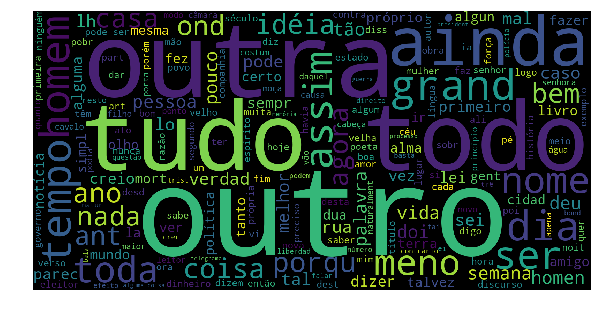

In [28]:
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)


In [29]:
#salvando a imagem
wordcloud.to_file("porter.png")